In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## [7.2.4 Exercises](https://r4ds.hadley.nz/data-import#exercises)

1. What function would you use to read a file where fields were separated with “|”?

read_delim()

2. Apart from file, skip, and comment, what other arguments do read_csv() and read_tsv() have in common?

All of their arguments are the same.

3. What are the most important arguments to read_fwf()?

The col_positions argument so it can know what the columns are.

4. Sometimes strings in a CSV file contain commas. To prevent them from causing problems, they need to be surrounded by a quoting character, like " or '. By default, read_csv() assumes that the quoting character will be ". To read the following text into a data frame, what argument to read_csv() do you need to specify?
```r
"x,y\n1,'a,b'"
```

quote = "\\'"

5. Identify what is wrong with each of the following inline CSV files. What happens when you run the code?
```r
read_csv("a,b\n1,2,3\n4,5,6")
read_csv("a,b,c\n1,2\n1,2,3,4")
read_csv("a,b\n\"1")
read_csv("a,b\n1,2\na,b")
read_csv("a;b\n1;3")
```

There are two column names but three columns.

In [3]:
read_csv("a,b\n1,2,3\n4,5,6")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 2 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): a
num (1): b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<dbl>,<dbl>
1,23
4,56


There are three column names but row one only has two columns and row two has four columns.

In [4]:
read_csv("a,b,c\n1,2\n1,2,3,4")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): a, b
num (1): c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,NA
1,2,34


The extra \" after the n makes it so that no values are entered into the table.

In [5]:
read_csv("a,b\n\"1")

Rows: 0 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<chr>,<chr>


Since both columns have a numeric and character value, the column type goes to character.

In [6]:
read_csv("a,b\n1,2\na,b")

Rows: 2 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<chr>,<chr>
1,2
a,b


The delimiter is ; instead of ,.

In [7]:
read_csv("a;b\n1;3")

Rows: 1 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): a;b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a;b
<chr>
1;3


6. Practice referring to non-syntactic names in the following data frame by:  

    a. Extracting the variable called 1.  
    b. Plotting a scatterplot of 1 vs. 2.  
    c. Creating a new column called 3, which is 2 divided by 1.  
    d. Renaming the columns to one, two, and three.    
```r
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)
```

In [30]:
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)
annoying

1,2
<int>,<dbl>
1,3.456991
2,2.774524
3,7.763572
4,6.761841
5,11.236072
6,11.928628
7,14.239181
8,17.778761
9,18.272125


In [31]:
# a
annoying |>
    select(`1`)

1
<int>
1
2
3
4
5
6
7
8
9


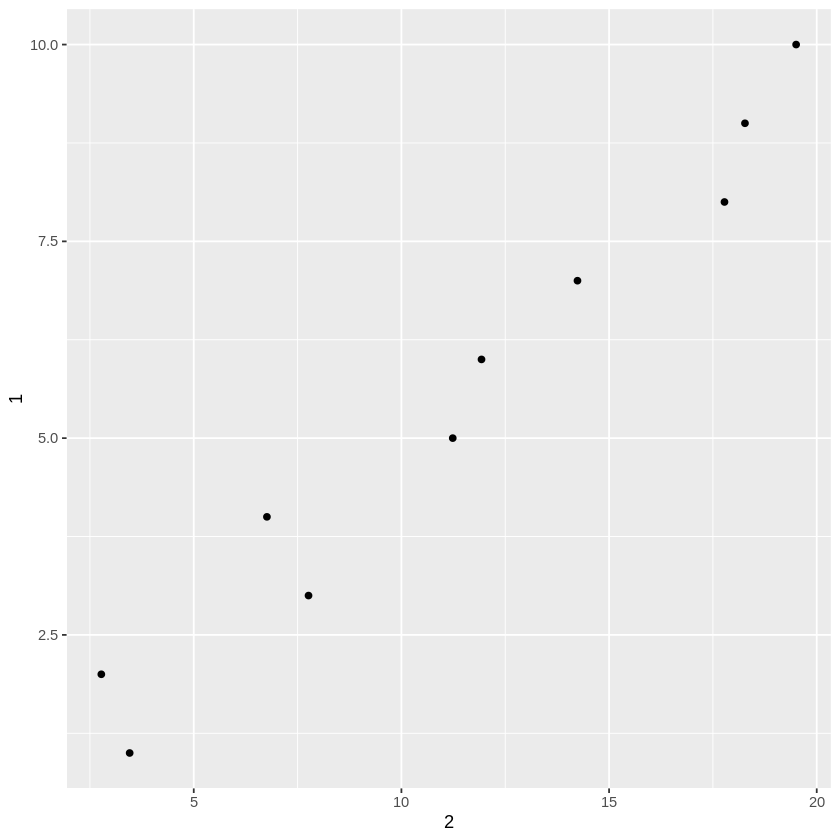

In [32]:
# b
ggplot(
  data = annoying, mapping = aes(x = `2`, y = `1`)) + 
  geom_point()

In [33]:
#c
annoying2 <- annoying |>
    mutate(`3` = `2` / `1`)
annoying2

1,2,3
<int>,<dbl>,<dbl>
1,3.456991,3.456991
2,2.774524,1.387262
3,7.763572,2.587857
4,6.761841,1.690460
5,11.236072,2.247214
6,11.928628,1.988105
7,14.239181,2.034169
8,17.778761,2.222345
9,18.272125,2.030236


In [34]:
#d
annoying3 <- annoying2 |>
    rename(one = `1`, two = `2`, three = `3`)
annoying3

one,two,three
<int>,<dbl>,<dbl>
1,3.456991,3.456991
2,2.774524,1.387262
3,7.763572,2.587857
4,6.761841,1.690460
5,11.236072,2.247214
6,11.928628,1.988105
7,14.239181,2.034169
8,17.778761,2.222345
9,18.272125,2.030236
